In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

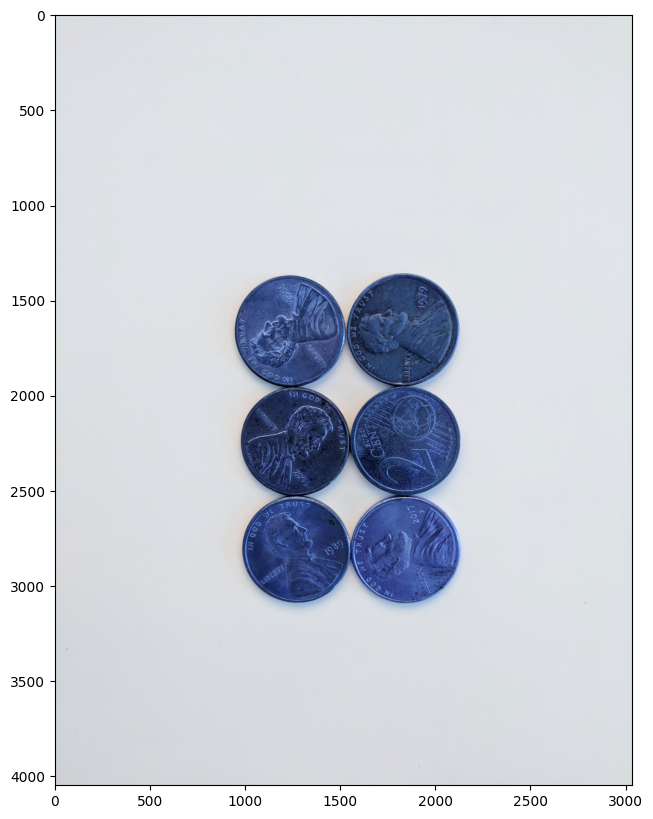

In [3]:
pennies = cv2.imread("data/pennies.jpg")
display(pennies)

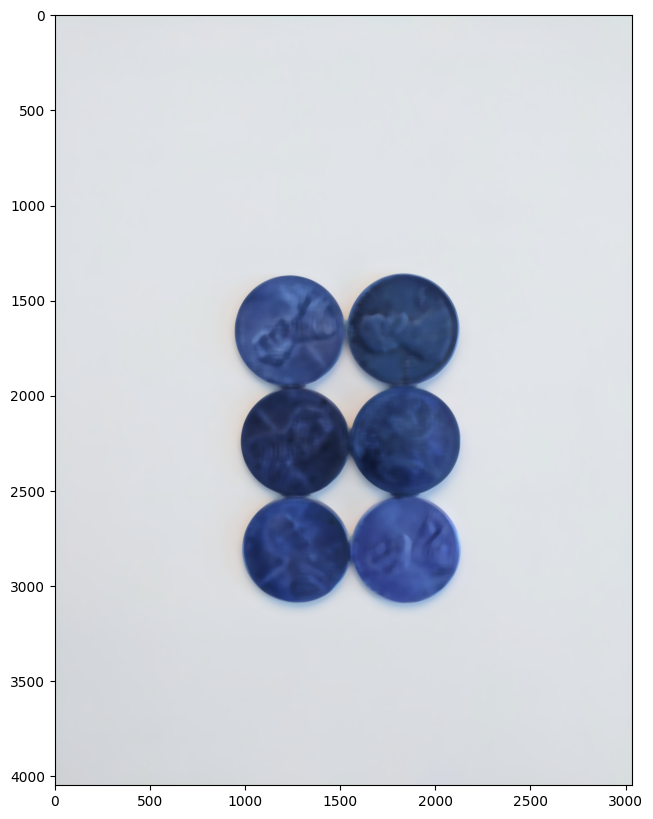

In [4]:
pennies_blur = cv2.medianBlur(pennies, ksize=35)
display(pennies_blur)

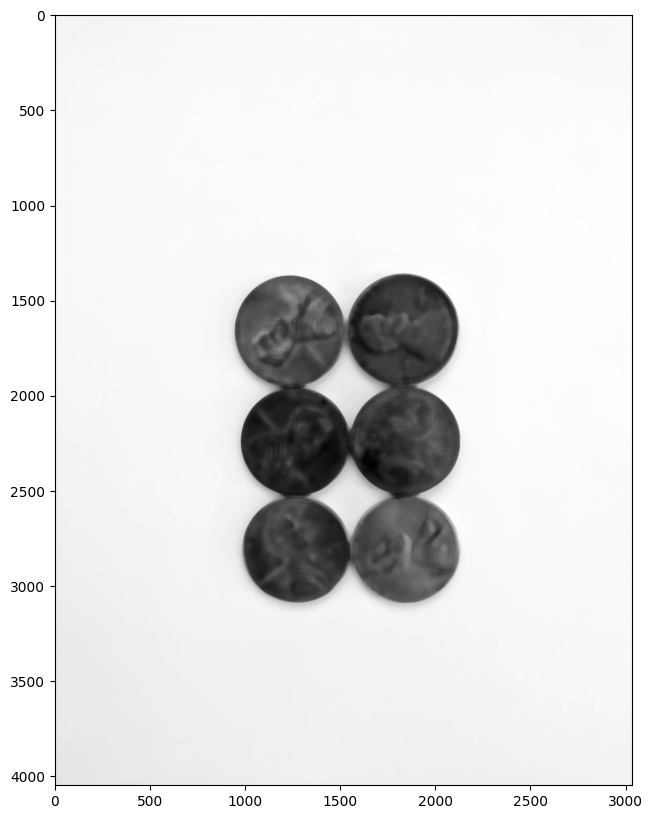

In [5]:
pennies_blur_gray = cv2.cvtColor(pennies_blur, cv2.COLOR_BGR2GRAY)
display(pennies_blur_gray)

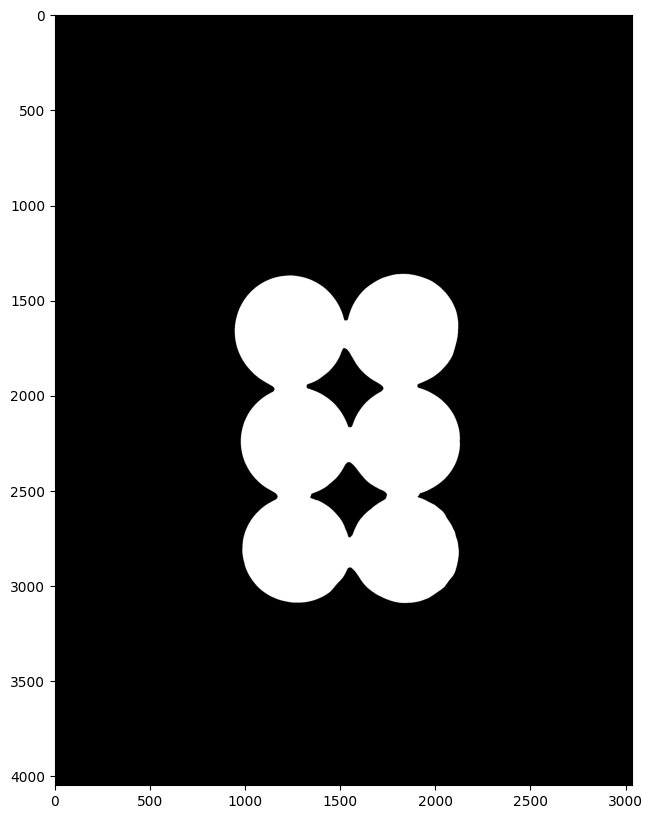

In [6]:
ret, pennies_thresh = cv2.threshold(pennies_blur_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(pennies_thresh)

In [7]:
contours, hierarchy = cv2.findContours(pennies_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
pennies_copy1 = pennies.copy()
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)\n",
    if hierarchy[0][i][3] == -1:
        # We can now draw the external contours from the list of contours\n",
        cv2.drawContours(pennies_copy1, contours, i, (255, 0, 0), 10)

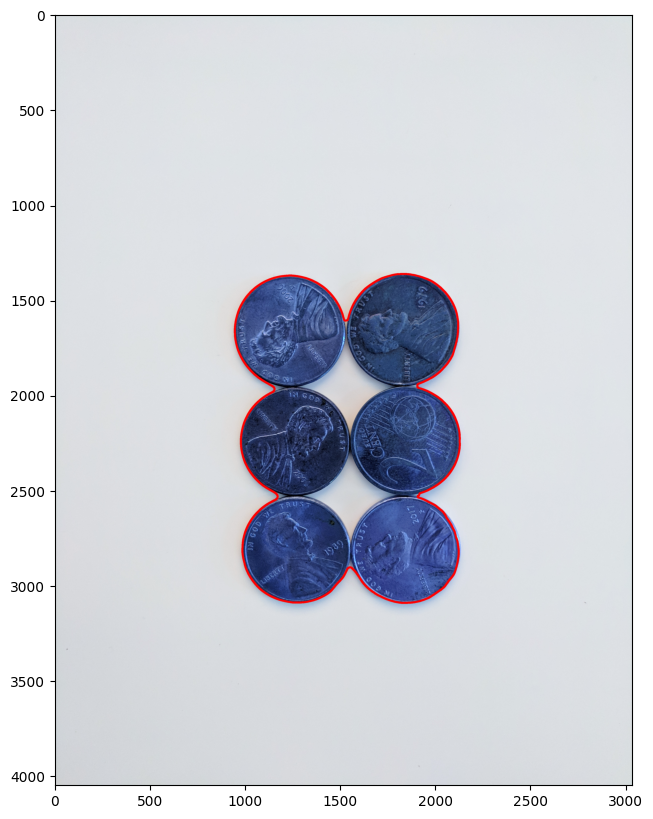

In [9]:
display(pennies_copy1)

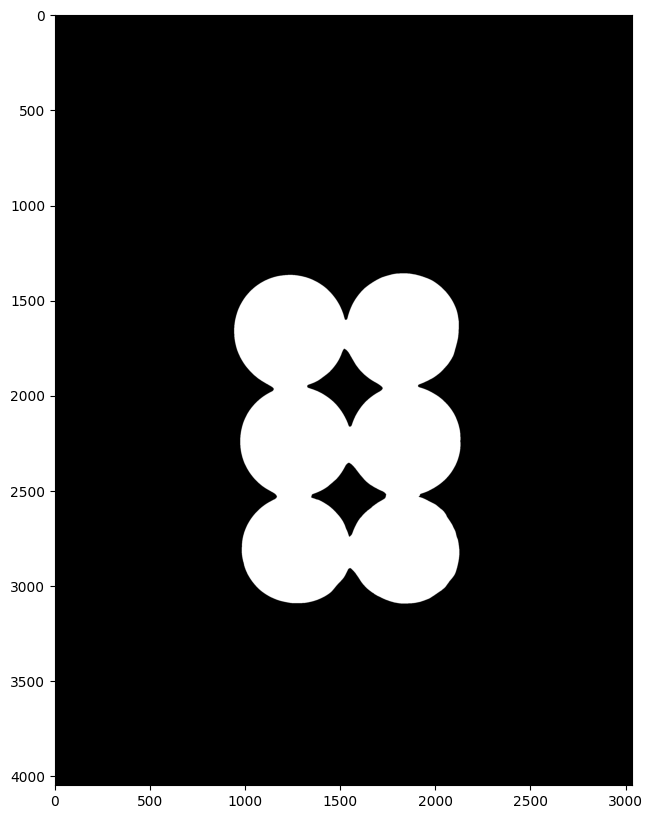

In [10]:
kernel = np.ones((3,3),np.uint8)
pennies_sure_bg = cv2.dilate(pennies_thresh,kernel,iterations=3)
display(pennies_sure_bg)

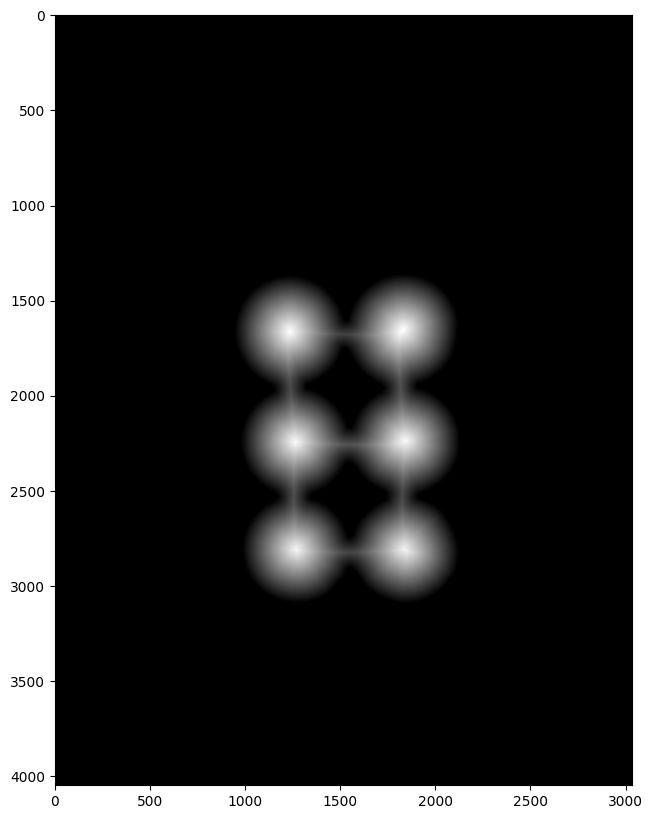

In [11]:
pennies_dist_transform = cv2.distanceTransform(pennies_thresh, cv2.DIST_L2, 5)
display(pennies_dist_transform)

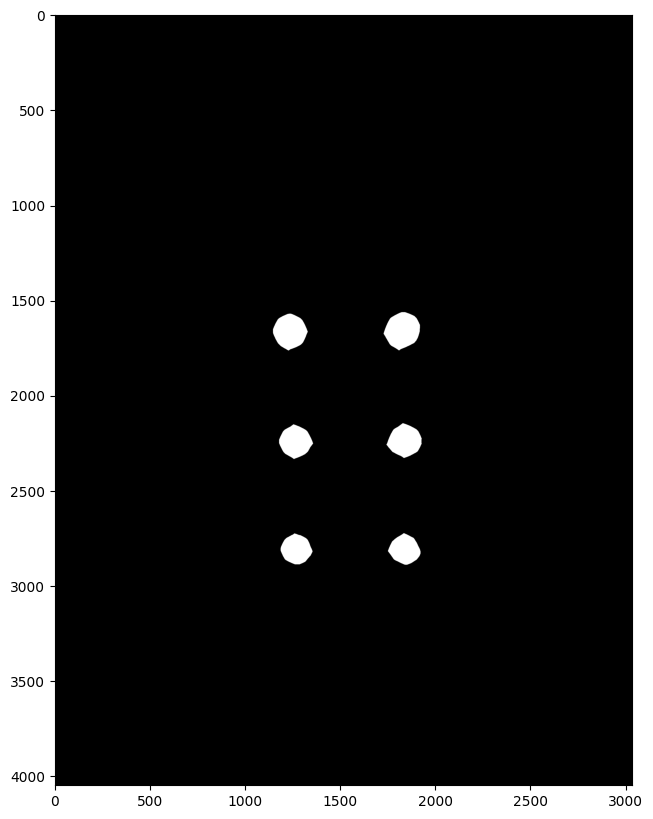

In [12]:
ret, pennies_sure_fg = cv2.threshold(pennies_dist_transform, 0.7*pennies_dist_transform.max(), 255, 0)
display(pennies_sure_fg)

In [13]:
pennies_sure_fg = np.uint8(pennies_sure_fg)

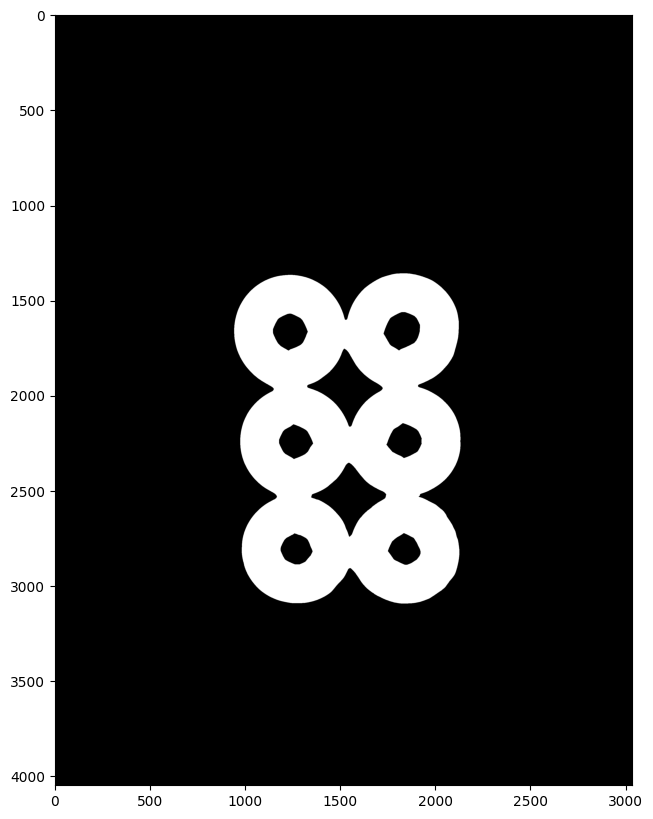

In [14]:
pennies_unknown = cv2.subtract(pennies_sure_bg, pennies_sure_fg)
display(pennies_unknown)

In [15]:
ret, pennies_markers = cv2.connectedComponents(pennies_sure_fg)

In [16]:
pennies_markers = pennies_markers + 1

In [17]:
pennies_markers[pennies_unknown==255] = 0

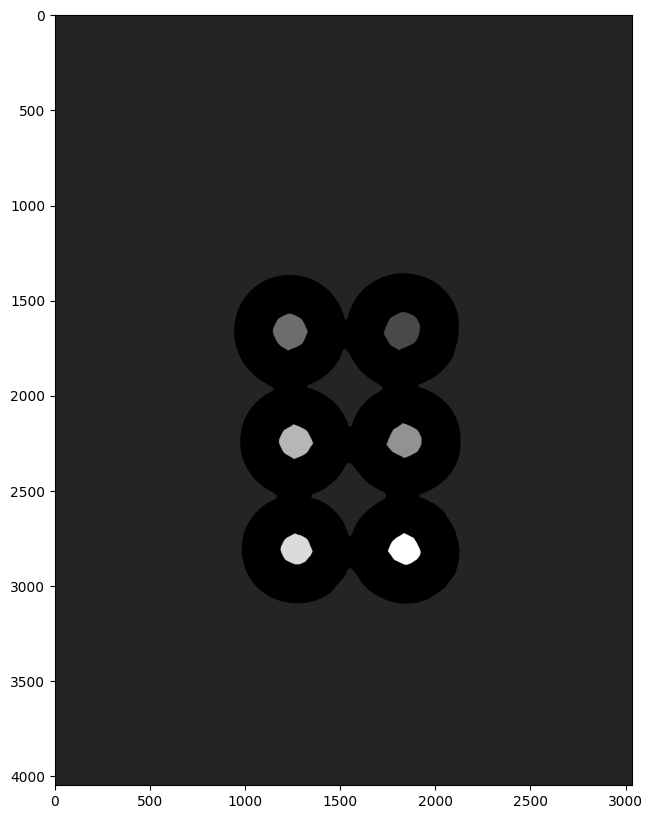

In [18]:
display(pennies_markers)

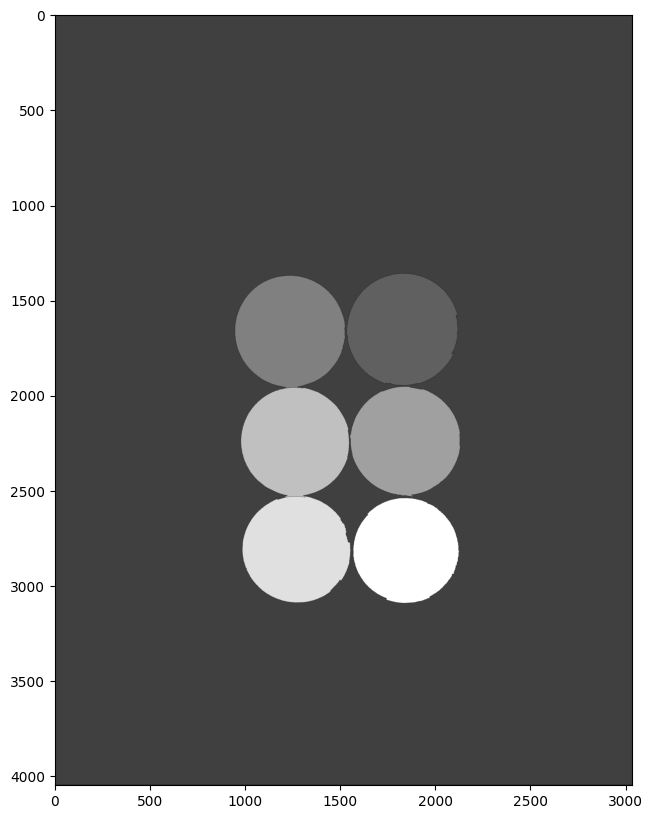

In [19]:
pennies_watershed_markers = cv2.watershed(pennies, pennies_markers)
display(pennies_watershed_markers)

In [20]:
contours, hierarchy = cv2.findContours(pennies_watershed_markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
pennies_copy2 = pennies.copy()
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)\n",
    if hierarchy[0][i][3] == -1:
        # We can now draw the external contours from the list of contours\n",
        cv2.drawContours(pennies_copy2, contours, i, (255, 0, 0), 10)

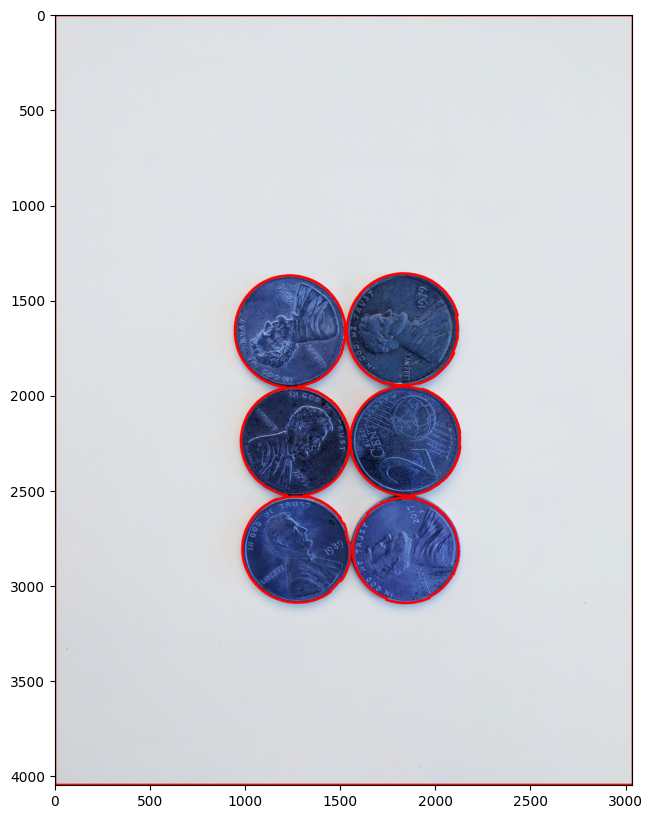

In [22]:
display(pennies_copy2)